In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder
from sklearn.model_selection import GridSearchCV
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.titlesize'] = 16

# 设置jupyter数据框最大显示的列数
pd.set_option('max_columns',100)
import operator

In [79]:
train_data = pd.read_csv('../train_data_mul.csv',encoding='gb2312',index_col='id')
targets = pd.read_csv('../targets.csv',encoding='gb2312',index_col='id')
feature_importance = pd.read_csv('../feature_importance.csv',encoding='gb2312')

In [43]:
# train_data.drop(['体检日期'],axis=1,inplace=True)
# feature_importance.loc[:400]

In [80]:
train_data.head()

,年龄*年龄,年龄**天门冬氨酸氨基转换酶,年龄**丙氨酸氨基转换酶,年龄**碱性磷酸酶,年龄**r-谷氨酰基转换酶,年龄**总蛋白,年龄*白蛋白,年龄**球蛋白,年龄*白球比例,年龄*甘油三酯,年龄*总胆固醇,年龄*高密度脂蛋白胆固醇,年龄*低密度脂蛋白胆固醇,年龄*尿素,年龄*肌酐,年龄*尿酸,年龄*乙肝表面抗原,年龄*乙肝表面抗体,年龄*乙肝e抗原,年龄*乙肝e抗体,年龄*乙肝核心抗体,年龄*白细胞计数,年龄*红细胞计数,年龄*血红蛋白,年龄*红细胞压积,年龄*红细胞平均体积,年龄*红细胞平均血红蛋白量,年龄*红细胞平均血红蛋白浓度,年龄*红细胞体积分布宽度,年龄*血小板计数,年龄*血小板平均体积,年龄*血小板体积分布宽度,年龄*血小板比积,年龄*中性粒细胞%,年龄*淋巴细胞%,年龄*单核细胞%,年龄*嗜酸细胞%,年龄*嗜碱细胞%,*天门冬氨酸氨基转换酶**天门冬氨酸氨基转换酶,*天门冬氨酸氨基转换酶**丙氨酸氨基转换酶,*天门冬氨酸氨基转换酶**碱性磷酸酶,*天门冬氨酸氨基转换酶**r-谷氨酰基转换酶,*天门冬氨酸氨基转换酶**总蛋白,*天门冬氨酸氨基转换酶*白蛋白,*天门冬氨酸氨基转换酶**球蛋白,*天门冬氨酸氨基转换酶*白球比例,*天门冬氨酸氨基转换酶*甘油三酯,*天门冬氨酸氨基转换酶*总胆固醇,*天门冬氨酸氨基转换酶*高密度脂蛋白胆固醇,*天门冬氨酸氨基转换酶*低密度脂蛋白胆固醇,...,红细胞体积分布宽度*淋巴细胞%,红细胞体积分布宽度*单核细胞%,红细胞体积分布宽度*嗜酸细胞%,红细胞体积分布宽度*嗜碱细胞%,血小板计数*血小板计数,血小板计数*血小板平均体积,血小板计数*血小板体积分布宽度,血小板计数*血小板比积,血小板计数*中性粒细胞%,血小板计数*淋巴细胞%,血小板计数*单核细胞%,血小板计数*嗜酸细胞%,血小板计数*嗜碱细胞%,血小板平均体积*血小板平均体积,血小板平均体积*血小板体积分布宽度,血小板平均体积*血小板比积,血小板平均体积*中性粒细胞%,血小板平均体积*淋巴细胞%,血小板平均体积*单核细胞%,血小板平均体积*嗜酸细胞%,血小板平均体积*嗜碱细胞%,血小板体积分布宽度*血小板体积分布宽度,血小板体积分布宽度*血小板比积,血小板体积分布宽度*中性粒细胞%,血小板体积分布宽度*淋巴细胞%,血小板体积分布宽度*单核细胞%,血小板体积分布宽度*嗜酸细胞%,血小板体积分布宽度*嗜碱细胞%,血小板比积*血小板比积,血小板比积*中性粒细胞%,血小板比积*淋巴细胞%,血小板比积*单核细胞%,血小板比积*嗜酸细胞%,血小板比积*嗜碱细胞%,中性粒细胞%*中性粒细胞%,中性粒细胞%*淋巴细胞%,中性粒细胞%*单核细胞%,中性粒细胞%*嗜酸细胞%,中性粒细胞%*嗜碱细胞%,淋巴细胞%*淋巴细胞%,淋巴细胞%*单核细胞%,淋巴细胞%*嗜酸细胞%,淋巴细胞%*嗜碱细胞%,单核细胞%*单核细胞%,单核细胞%*嗜酸细胞%,单核细胞%*嗜碱细胞%,嗜酸细胞%*嗜酸细胞%,嗜酸细胞%*嗜碱细胞%,嗜碱细胞%*嗜碱细胞%,年龄
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1681,1023.36,947.10,4083.19,829.43,3152.08,2033.60,1118.48,74.62,53.71,181.63,56.17,108.65,240.67,3167.25,14324.99,2.05,125.665,1.64,67.24,68.47,218.94,213.61,6810.1,19.639,3767.9,1307.9,14227.0,524.8,6806.0,405.9,713.4,6.724,2218.1,1402.2,266.5,192.7,24.6,623.0016,576.5760,2485.7664,504.9408,1918.9248,1238.0160,680.9088,45.4272,32.6976,110.5728,34.1952,66.1440,...,437.76,83.20,60.16,7.68,27556.0,1643.4,2888.4,27.224,8980.6,5677.2,1079.0,780.2,99.6,98.01,172.26,1.6236,535.59,338.58,64.35,46.53,5.94,302.76,2.8536,941.34,595.08,113.10,81.78,10.44,0.026896,8.8724,5.6088,1.0660,0.7708,0.0984,2926.81,1850.22,351.65,254.27,32.46,1169.64,222.30,160.74,20.52,42.25,30.55,3.90,22.09,2.82,0.36,41
2,1681,1007.37,1486.25,2755.61,3239.00,3256.63,1958.16,1298.47,61.91,115.21,166.46,38.13,107.83,215.66,3571.92,19957.98,2.05,125.665,1.64,67.24,68.47,313.65,213.61,6396.0,18.696,3587.5,1225.9,14022.0,549.4,11357.0,377.2,422.3,10.660,2132.0,1504.7,237.8,192.7,32.8,603.6849,890.6625,1651.3497,1941.0300,1951.5951,1173.4632,778.1319,37.1007,69.0417,99.7542,22.8501,64.6191,...,491.78,77.72,62.98,10.72,76729.0,2548.4,2853.1,72.020,14404.0,10165.9,1606.6,1301.9,221.6,84.64,94.76,2.3920,478.40,337.64,53.36,43.24,7.36,106.09,2.6780,535.60,378.01,59.74,48.41,8.24,0.067600,13.5200,9.5420,1.5080,1.2220,0.2080,2704.00,1908.40,301.60,244.40,41.60,1346.89,212.86,172.49,29.36,33.64,27.26,4.64,22.09,3.76,0.64,41
3,2116,957.72,700.58,2929.74,1755.82,3966.58,2208.00,1758.58,57.96,45.54,189.98,75.44,92.46,219.42,3596.74,20795.22,0.46,0.920,0.46,63.02,49.22,211.60,218.96,6844.8,20.148,4227.4,1439.8,15640.0,598.0,11086.0,381.8,763.6,9.154,2212.6,1853.8,354.2,147.2,36.8,433.4724,317.0886,1326.0258,794.6994,1795.3086,999.3600,795.9486,26.2332,20.6118,85.9866,34.1448,41.8482,...,523.90,100.10,41.60,10.40,58081.0,2000.3,4000.6,47.959,11592.1,9712.3,1855.7,771.2,192.8,68.89,137.78,1.6517,399.23,334.49,63.91,26.56,6.64,275.56,3.3034,798.46,668.98,127.82,53.12,13.28,0.039601,9.5719,8.0197,1.5323,0.6368,0.1592,2313.61,1938.43,370.37,153.92,38.48,1624.09,310.31,128.96,32.24,59.29,24.64,6.16,10.24,2.56,0.64,46
4,484,329.78,232.98,1629.76,444.84,1561.56,968.44,593.12,35.86,23.32,151.58,31.46,110.88,93.06,1352.12,8114.70,1.10,67.430,0.88,36.08,36.74,205.92,94.38,3014.0,8.866,2065.8,701.8,7480.0,277.2,5544.0,226.6,237.6,5.720,917.4,1023.0,147.4,101.2,11.0,224.7001,158.7441,1110.4592,303.0978,1063.9902,659.8598,404.1304,24.4337,15.8894,103.2811,21.4357,75.5496,...,585.90,84.42,57.96,6.30,63504.0,2595.6,2721.6,65.520,10508.4,11718.0,1688.4,1159.2,126.0,106.09,111.24,2.6780,429.51,478.95,69.01,47.38,5.15,116.64,2.80

In [37]:
most_important = feature_importance['feature'].loc[:50]
poly = PolynomialFeatures(2)
train_data_most_important = pd.DataFrame(poly.fit_transform(train_data[most_important]),index=train_data.index)
train_data = pd.concat([train_data,train_data_most_important],axis=1)

# XGBoost做回归

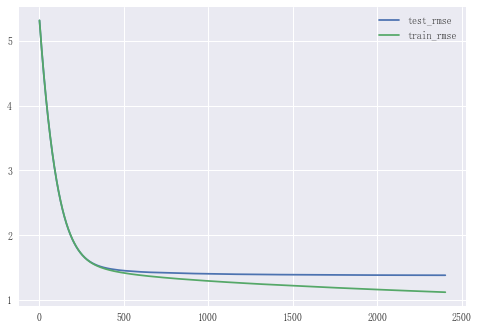

In [81]:
from xgboost.sklearn import XGBRegressor
# from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet,LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

#  划分样本集
# features= feature_importance['feature'].loc[:1000]
train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.18,random_state=66)
# # 过采样
# train_x_minority = train_x[train_y['血糖'] >8]
# train_y_minority = train_y[train_y['血糖']>8]
# train_minority = resample(pd.concat([train_x_minority,train_y_minority],axis=1),
#                                  replace=True,     # sample with replacement
#                                  n_samples=int(train_y_minority.shape[0]/2),    
#                                  random_state=123) # reproducible results
# train_x = pd.concat([train_x,train_minority.drop(['血糖'],axis=1)])
# train_y = pd.concat([train_y,pd.DataFrame(train_minority['血糖'])])      
#----------------------------------------------------training xgboost-----------------------------------------#
dtrain = xgb.DMatrix(train_x,label=train_y)
dtest = xgb.DMatrix(test_x)
# 交叉验证
params={'booster':'gbtree',
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'max_depth':3,
    'lambda':200,
    'subsample':0.75,
    'colsample_bytree':0.7,
    'eta': 0.008,#0.002
    'seed':1024,
    'nthread':3,
    'reg_alpha':0.1
    }

# 设置参数
watchlist  = [(dtrain,'train')]

#通过cv找最佳的nround
cv_log = xgb.cv(params,dtrain,num_boost_round=2500,nfold=4,metrics='rmse',early_stopping_rounds=50,seed=1024)
# bst_rmse= cv_log['test-rmse-mean'].min()
# cv_log['nb'] = cv_log.index
# cv_log.index = cv_log['test-rmse-mean']
# bst_nb = cv_log.nb.to_dict()[bst_rmse]
# model = xgb.train(params,dtrain,num_boost_round=2000,evals=watchlist,early_stopping_rounds=50)
#---------------------------------------------特征重要性----------------------------------------------#
# importance = model.get_fscore()
# importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)

# feature_importance = pd.DataFrame(importance, columns=['feature', 'fscore'])
# # top30
# most_important = feature_importance['feature'].loc[:30]
#-----------------------------------------------------------------------------------------------------#
# pre_y_xgb = model.predict(dtest)
# train_new = model.predict(dtrain,pred_leaf=True)
# test_new = model.predict(dtest,pred_leaf=True)

# enet = ElasticNet(alpha=0.001, l1_ratio=0.005,normalize=True,tol=0.01)
# pre_y_ent = enet.fit(train_x, train_y).predict(test_x)
# pre_y_xgb_ent = enet.fit(train_new, train_y).predict(test_new)

# print(mse(test_y,pre_y_xgb))
# print(mse(test_y,pre_y_ent))
# print(mse(test_y,pre_y_xgb_ent))

# plt.figure(figsize=(15,30))
# xgb.plot_importance(cv_log)
plt.plot(cv_log.index,cv_log['test-rmse-mean'],label='test_rmse')
plt.plot(cv_log.index,cv_log['train-rmse-mean'],label='train_rmse')
plt.legend(loc='upper right')
plt.show()

# 交叉验证输出

# pre_train_y = xgb.predict(train_x)
# print(mse(train_y,pre_train_y))

#predict test set
# pre_y = model.predict(dtest)
# print(mse(test_y,pre_y))

## 测试集样本的真实值和预测值

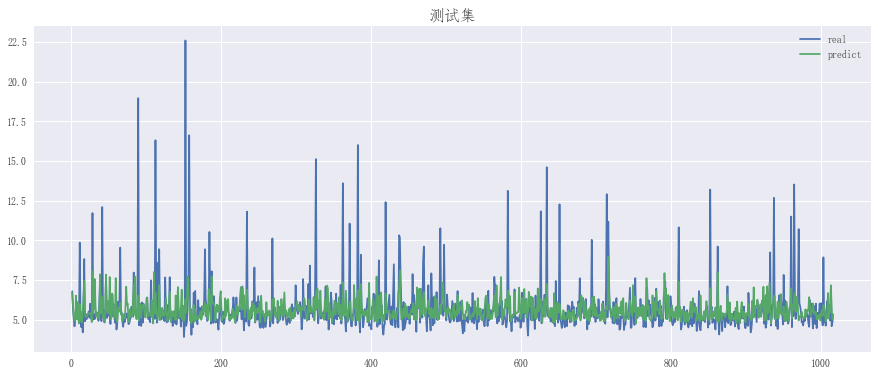

In [61]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(test_y.shape[0])+1,test_y,label='real')
plt.plot(np.arange(pre_y_xgb.shape[0])+1,pre_y_xgb,label='predict')
plt.legend(loc='upper right')
plt.title('测试集')
plt.show()

In [62]:
feature_importance.loc[:50]

,feature,fscore
0,红细胞平均体积_红细胞平均血红蛋白浓度,266
1,红细胞平均体积*红细胞体积分布宽度,183
2,年龄*白细胞计数,138
3,*天门冬氨酸氨基转换酶_*丙氨酸氨基转换酶,136
4,年龄**r-谷氨酰基转换酶,129
5,年龄*甘油三酯,127
6,年龄*血红蛋白,127
7,年龄_尿酸,125
8,*碱性磷酸酶_单核细胞%,118
9,尿酸*红细胞压积,114


In [49]:
importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
feature_importance = pd.DataFrame(importance, columns=['feature', 'fscore'])
feature_importance.to_csv('../feature_importance.csv',index=False)

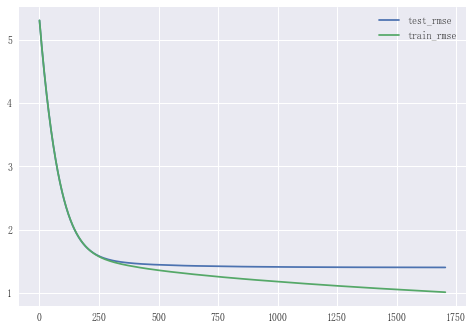

In [9]:
plt.plot(cv_log.index,cv_log['test-rmse-mean'],label='test_rmse')
plt.plot(cv_log.index,cv_log['train-rmse-mean'],label='train_rmse')
plt.legend(loc='upper right')
plt.show()

# 先分类再回归
先将一些异常大的值（长尾）数据作一个分类，分类训练模型，不同的类训练不同的回归模型

In [55]:
pre_y[pre_label > np.sort(pre_label)[pre_label.shape[0] - 60]] = tau
#predict test set
# pre_y = model.predict(dtest)
print(mse(test_y,pre_y))

2.13789319864


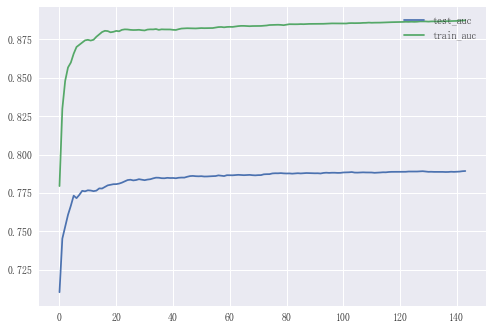

In [57]:
import xgboost as xgb
train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.18,random_state=66)
tau = 7.5
scale_weight = float(len(train_label)-train_label.sum())/train_label.sum()
proba_tau = int(test_x.shape[0]/scale_weight)
train_label = np.where(train_y>tau,1,0)
test_label = np.where(test_y>tau,1,0)
dtrain = xgb.DMatrix(train_x,label=train_label)
dtest = xgb.DMatrix(test_x)
watchlist  = [(dtrain,'train')]
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'scale_pos_weight':scale_weight,
    'eval_metric': 'auc',
    'max_depth':6,
    'lambda':70,
    'subsample':0.6,
    'colsample_bytree':0.6,
    'eta': 0.001,
    'seed':1024,
    'nthread':3
    }
model = xgb.train(params,dtrain,num_boost_round=120,evals=watchlist)
pre_label = model.predict(dtest)
pre_y[pre_label > np.sort(pre_label)[pre_label.shape[0] - proba_tau]] = tau
plt.plot(cv_log.index,cv_log['test-auc-mean'],label='test_auc')
plt.plot(cv_log.index,cv_log['train-auc-mean'],label='train_auc')
plt.legend(loc='upper right')
plt.show()

In [107]:
feature_50 = df_feature.sort_values('feature_important',ascending=False)[:50]['features']

In [111]:
train = train_data.copy()
train_data = train_data[feature_50]

# GBDT做回归

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test_mse: 2.11885561632
train_mse: 1.18575411877


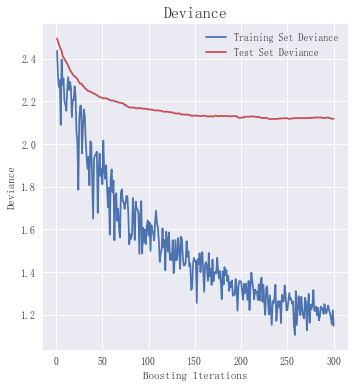

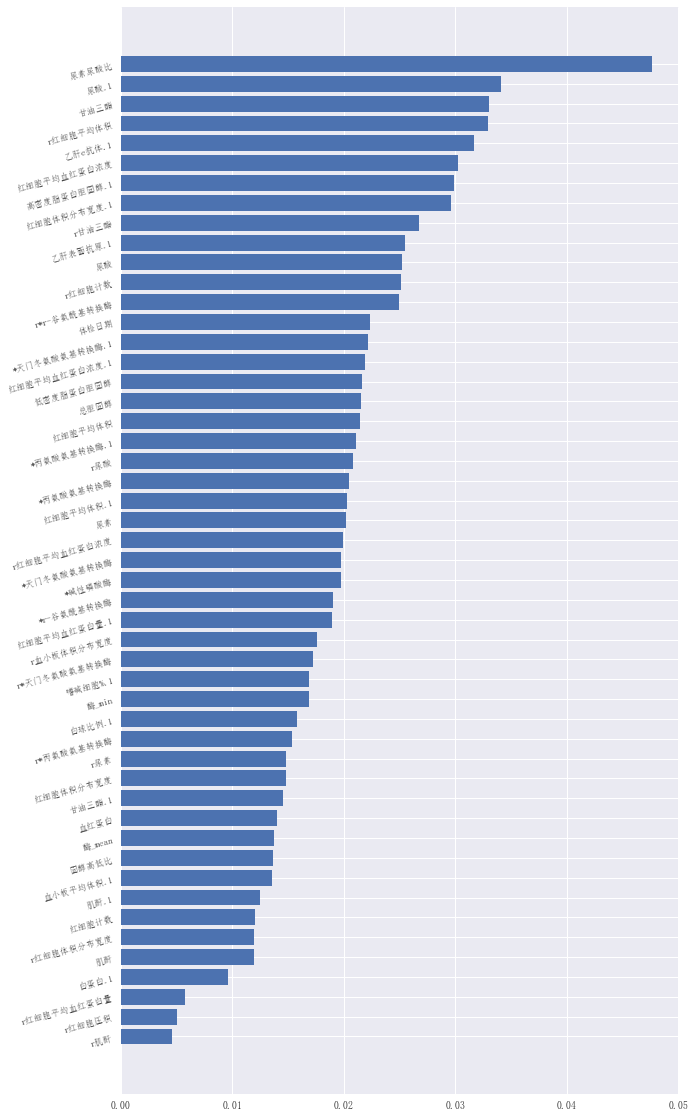

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(2)
# data = poly.fit_transform(train_data)

# Fit regression mo#  划分样本集

train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.18,random_state=66)
def learner(clf):
    # 训练
    clf.fit(train_x, train_y)

    # 预测
    pre_y = clf.predict(test_x)
    print('test_mse:',mse(test_y,pre_y))
    pre_train_y = clf.predict(train_x)
    print('train_mse:',mse(train_y,pre_train_y))
    return clf,pre_y,pre_train_y
# 设置参数
params = {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 10,'subsample':0.8,'max_features':'log2','max_leaf_nodes':5,
          'learning_rate': 0.04, 'loss': 'ls','warm_start':True}
gbdt = GradientBoostingRegressor(**params)
(gbdt,pre_y,pre_train_y) = learner(gbdt)
# param_grid = [{'criterion':[3,4]}]
# grid_search = GridSearchCV(gbdt,param_grid,cv=4,scoring='neg_mean_squared_error')
# grid_search.fit(train_x,train_y)
# # 交叉验证输出
# print('grid_scores_',grid_search.grid_scores_)
# print('best_pram',grid_search.best_estimator_)
# # 预测
# pre_y = grid_search.predict(test_x)
# print(mse(test_y,pre_y))
# pre_train_y = grid_search.predict(train_x)
# print(mse(train_y,pre_train_y))
# 训练
# xgb.fit(train_x, train_y)
# pre_y = xgb.predict(test_x)


test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, pre_y in enumerate(gbdt.staged_predict(test_x)):
    test_score[i] = mse(test_y, pre_y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbdt.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
# 画出特征重要性图
features = list(train_data.columns)
feature_important = gbdt.feature_importances_
df_feature = pd.DataFrame({'features':features,'feature_important':feature_important})
df_feature.sort_values(by='feature_important',inplace=True)
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(features)),df_feature['feature_important'])
plt.yticks(np.arange(len(features)),df_feature['features'],fontsize=9,rotation=15)
plt.show()

## 测试集样本的真实值和预测值

In [267]:
# train_data.loc[big_error_index.index].sort_index()

In [202]:
import pickle
big_error_index = test_y[np.square(error)>2]
with open('big_error_index.pickle', 'wb') as f:
     pickle.dump(big_error_index, f)
# test_y.index[np.square(error)>2]

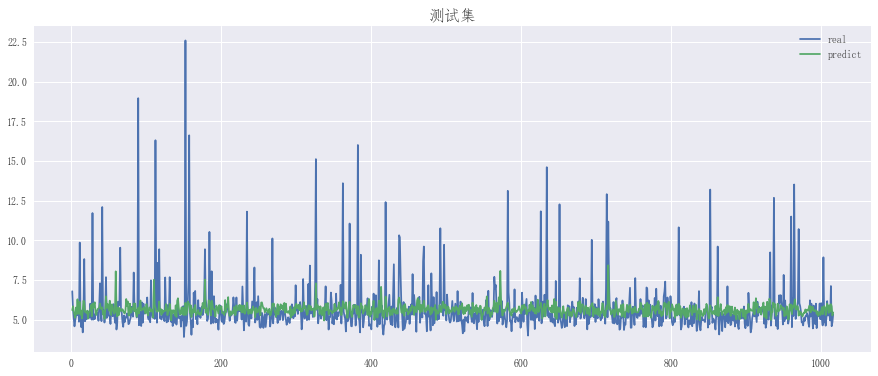

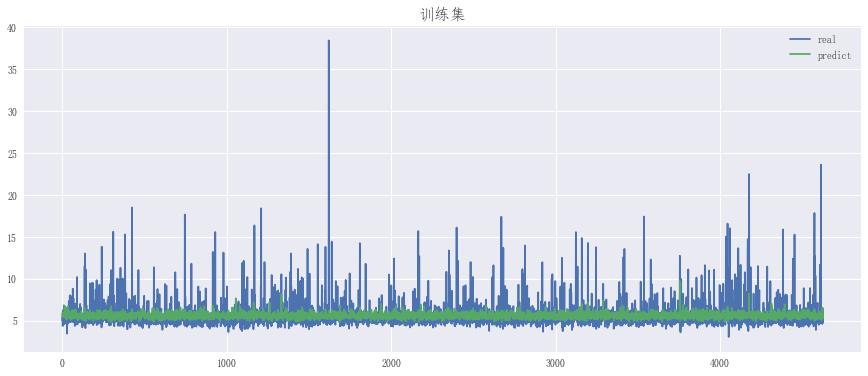

In [71]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(test_y.shape[0])+1,test_y,label='real')
plt.plot(np.arange(pre_y.shape[0])+1,pre_y,label='predict')
plt.legend(loc='upper right')
plt.title('测试集')
plt.show()
plt.figure(figsize=(15,6))
plt.plot(np.arange(train_y.shape[0])+1,train_y,label='real')
plt.plot(np.arange(pre_train_y.shape[0])+1,pre_train_y,label='predict')
plt.legend(loc='upper right')
plt.title('训练集')
plt.show()
# sns.distplot(test_y,label='test_y')
# sns.distplot(pre_y,label='pre_y')
# plt.title('测试集')
# plt.show()
# sns.distplot(train_y,label='train_y')
# sns.distplot(pre_train_y,label='pre_train_y')
# plt.title('训练集')
# plt.show()

# 弹性网做回归

In [70]:
from sklearn.linear_model import ElasticNet,LinearRegression
from sklearn.model_selection import cross_val_score

def mse_cv(model):
    mse= -cross_val_score(model, train_data, targets, scoring="neg_mean_squared_error", cv = 5)
    return(mse)

train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.18,random_state=66)
enet = ElasticNet(alpha=0.01, l1_ratio=0.05,normalize=True,tol=0.01)

pre_y = enet.fit(train_x, train_y).predict(test_x)
# 预测
# pre_y[pre_y >30] = 30
# pre_y[pre_y<3] = 3
print(mse(test_y,pre_y))
pre_train_y = enet.predict(train_x)
print(mse(train_y,pre_train_y))

2.23396668253
2.07841542885


In [183]:
pre_y[pre_y >30] = 30
pre_y[pre_y<3] = 3
print(mse(test_y,pre_y))
pre_train_y = enet.predict(train_x)
print(mse(train_y,pre_train_y))

1.63441526324
1.61646358852


In [63]:
# targets.sort_values('血糖',ascending=False)